In [59]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns

前處理

In [60]:
ori_data = pd.read_csv('HW3_bike-sharing.csv')
ori_data['datetime'] = pd.to_datetime(ori_data['datetime'])

datetimesplit = ['year','month','day','hour','dayofweek']
datetime_data = [ori_data['datetime'].dt.year,ori_data['datetime'].dt.month,ori_data['datetime'].dt.day,
                 ori_data['datetime'].dt.hour,ori_data['datetime'].dt.dayofweek]

for col,data in zip(datetimesplit,datetime_data):
    ori_data.insert(0,col,data)

del ori_data['datetime']
#ori_data['datetime'] = ori_data['datetime'].map(lambda x: int(round(x.timestamp())))

個參數之間熱力圖

<AxesSubplot:>

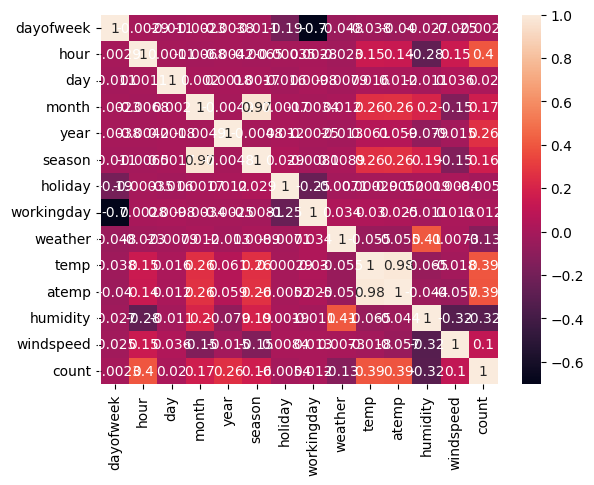

In [61]:
correlation_matrix = ori_data.corr()
sns.heatmap(correlation_matrix,annot=True)

發現在時間中，year、hour與count相關性最高

In [62]:
#標準化
std_sca = StandardScaler()
for col in ['temp','atemp','windspeed','humidity']:
    temp = np.array(ori_data[col])[:,np.newaxis]
    std_sca.fit(temp)
    ori_data[col] = std_sca.transform(temp)

In [63]:
#將hour、year targetencoder
OH = TargetEncoder(cols=['year','hour'])
ori_data_count = np.array(ori_data['count'])[:,np.newaxis]
OH.fit(ori_data,ori_data_count)
matrix_data = np.array(OH.transform(ori_data))

train_data, test_data ,train_target , test_target = train_test_split(matrix_data[:,:-1],matrix_data[:,-1],test_size=0.3,random_state=2019)

d:\深度學習練習\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
d:\深度學習練習\venv\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


以Polynominal linear regression 訓練

Score:  0.7299257077975203
Accuracy: 72.99257077975203%
MSE:  8958.44722605222


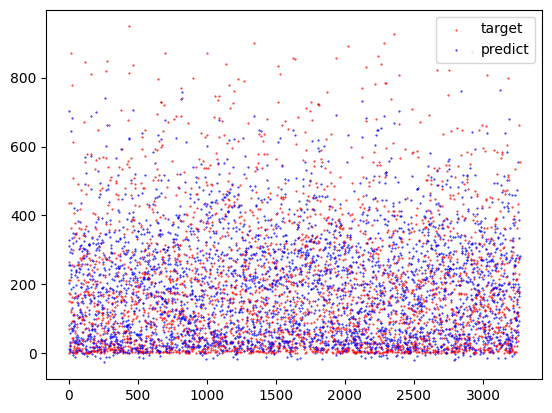

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
regressor = make_pipeline(PolynomialFeatures(),LinearRegression(positive=True,fit_intercept=False))
regressor.fit(train_data,train_target)

test_pred = regressor.predict(test_data)

score = regressor.score(test_data, test_target)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')
print('MSE: ' ,mean_squared_error(test_target,test_pred))

test_length = len(test_target)
plt.scatter(np.arange(test_length),test_target,s=0.2,color ='r',label='target')
plt.scatter(np.arange(test_length),test_pred,s=0.2,color ='b',label='predict')
plt.legend(loc='best')

以random forest regressor 訓練

Score:  0.9432942944043327
Accuracy: 94.32942944043326%
MSE:  1880.9456718449412


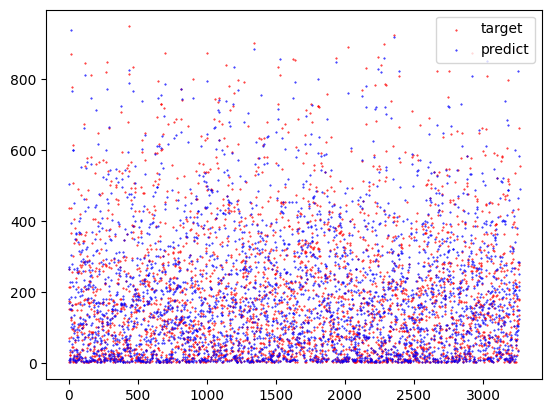

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(310,random_state=30)
forest.fit(train_data, train_target)
test_pred = forest.predict(test_data)
MSE = mean_squared_error(test_target,test_pred)
score = forest.score(test_data, test_target)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')
print('MSE: ',MSE)

test_length = len(test_target)
plt.scatter(np.arange(test_length),test_target,s=0.2,color ='r',label='target')
plt.scatter(np.arange(test_length),test_pred,s=0.2,color ='b',label='predict')
plt.legend(loc='best')
    

#將日期切割為年月日時間，並將hour, year targetencoding，且以poly linear-regression 進行訓練，效果很差，之後查閱資料，發現以決策樹模型最佳，最後以隨機森林模型得出結果最佳